# Munich chainladder model

Now we will explore the properties and methods underlying the Munich Chainladder class.

As usual, we we import the chainladder package as well as the popular pandas package.  For plotting purposes, we will also be using Jupyter's `%matplotlib inline` magic function.  

### Load package and data

In [1]:
import chainladder as cl
import pandas as pd
%matplotlib inline

C:\Users\jboga\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


The Munich chainladder method is useful when both a paid and incurred triangle are available.  It is an improvement on the standard chainladder in that it considers the ratio of Paid/Incurred **(P/I)** triangle to adjust both the paid and incurred ultimates.  A nice property of the Munich chainladder method is that the **(P/I)** ratio approaches 1.0 as the development period approaches ultimate.  This makes the Paid ultimate and Incurred ultimate converge towards the same value, a property not found in the basic chainladder method. 

The chainladder package comes loaded with `MCLincurred` and `MCLpaid` datasets to illustrate the Munich Chainladder method.  We will load these and verify that the **(P/I)** ratios approach 1.0

In [12]:
MCL_inc = cl.load_dataset('MCLincurred')
MCL_paid = cl.load_dataset('MCLpaid')
MCL_paid/MCL_inc

dev,1,2,3,4,5,6,7
origin,,,,,,,
1.0,0.588957,0.857414,0.923149,0.944030,0.954002,0.963336,0.980221
2.0,0.469631,0.763323,0.876723,0.900000,0.910686,0.956805,NaN
3.0,0.486226,0.863114,0.905066,0.960000,0.967700,NaN,NaN
4.0,0.652770,0.888218,0.942998,0.952458,NaN,NaN,NaN
5.0,0.664296,0.773863,0.957955,NaN,NaN,NaN,NaN
6.0,0.545799,0.910123,NaN,NaN,NaN,NaN,NaN
7.0,0.407009,NaN,NaN,NaN,NaN,NaN,NaN


### Create the Munich chainladder model

The Munich chainladder model, unlike the Mack model, only allows for volume-weighted link-ratios.  As such, there is no alpha parameter.  Like the Mack model, we do have the option of specifying exponential tail fits to our data, but for the purposes of this tutorial we will allow the tails to default to 1.0.

In [3]:
MCL = cl.MunichChainladder(MCL_paid, MCL_inc)

The summary shows that the Ult. Paid and Ult. Incurred are indeed very close, with paids slightly less than incurred.

In [11]:
MCL.summary()

,Latest Paid,Latest Incurred,Latest P/I Ratio,Ult. Paid,Ult. Incurred,P/I Ratio
origin,,,,,,
1.0,2131.0,2174.0,0.980221,2131.000000,2174.000000,0.980221
2.0,2348.0,2454.0,0.956805,2384.842092,2443.222400,0.976105
3.0,4494.0,4644.0,0.967700,4553.623621,4634.357895,0.982579
4.0,5850.0,6142.0,0.952458,6069.509293,6182.347407,0.981748
5.0,4648.0,4852.0,0.957955,4878.950383,4957.805406,0.984095
6.0,4010.0,4406.0,0.910123,4598.995746,4672.401782,0.984289
7.0,2044.0,5022.0,0.407009,7504.575860,7655.377611,0.980301


### Comparison to the basic chainladder

We can see that the basic chainladder does not guarantee that the paid and incurred ratios converge to 1.0, with the below data ranging from a low of 0.73 to a high of 1.11.

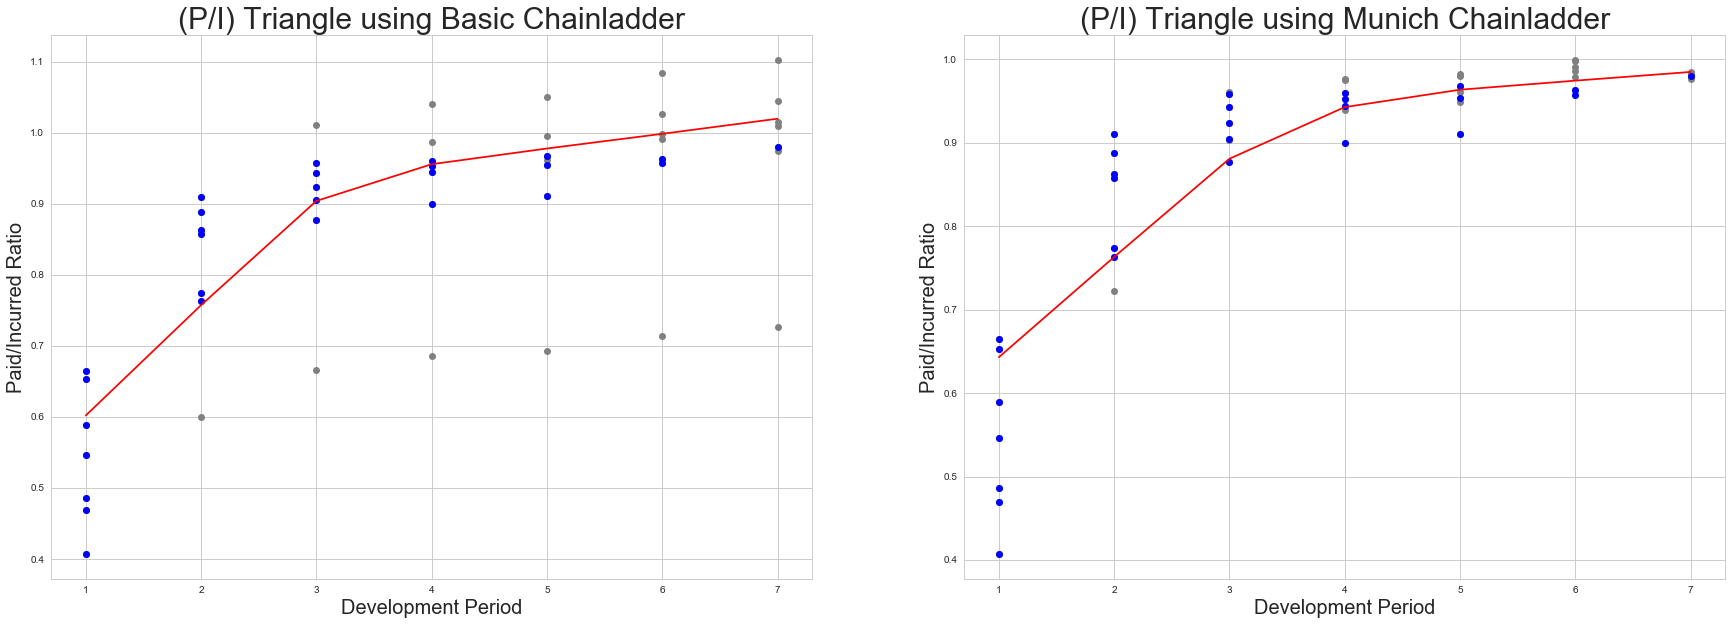

In [5]:
MCL.plot(plots=['PI1','PI2'])

The Munich model's effect on ultimates can be drastic by origin year.  For this data, a paid Mack approach would understand the latest origin period relative to both the Munich method and the Mack Incurred ultimate.

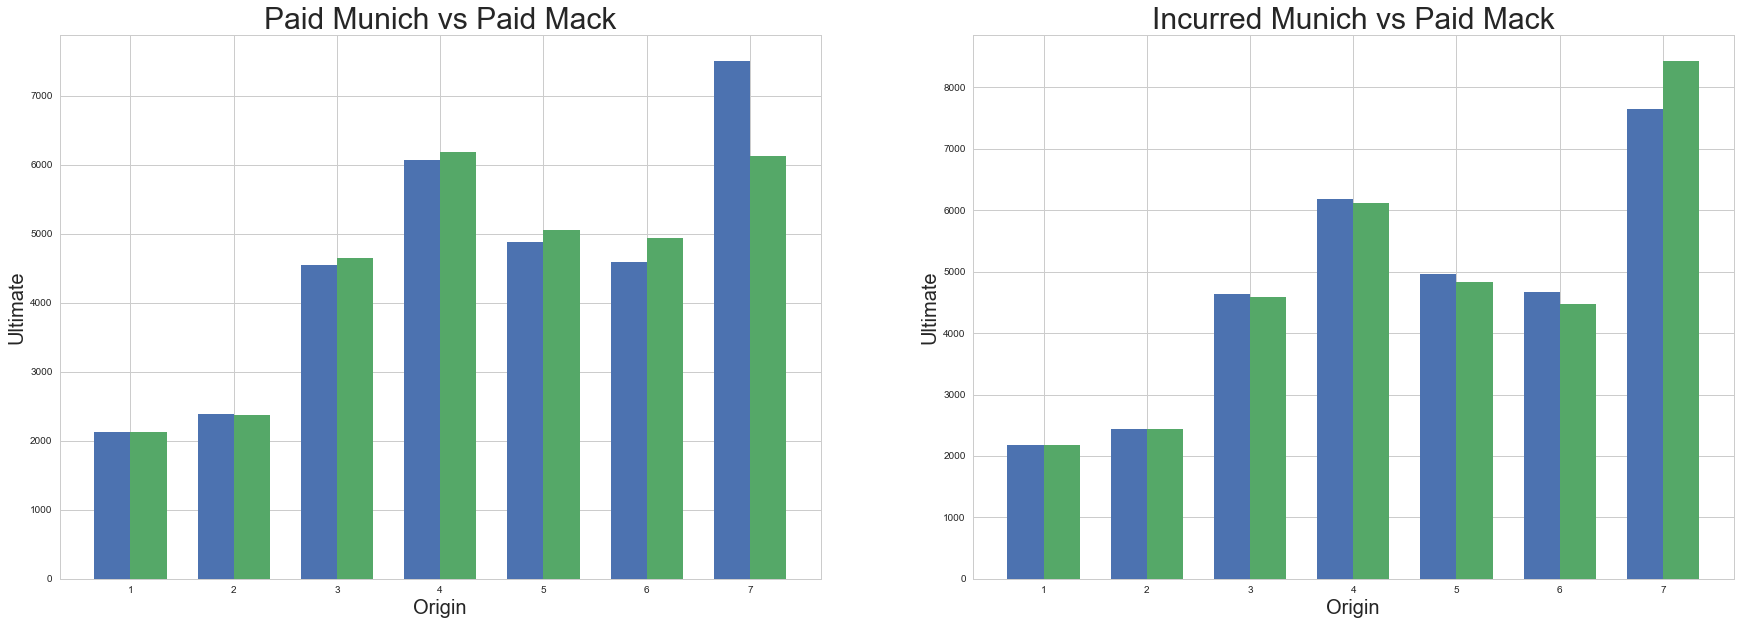

In [6]:
MCL.plot(plots=['MCLvsMackpaid','MCLvsMackinc'])

### An 'R' view

Not specifying plots will render a view similar to the chainladder package in R which includes residual graphs.

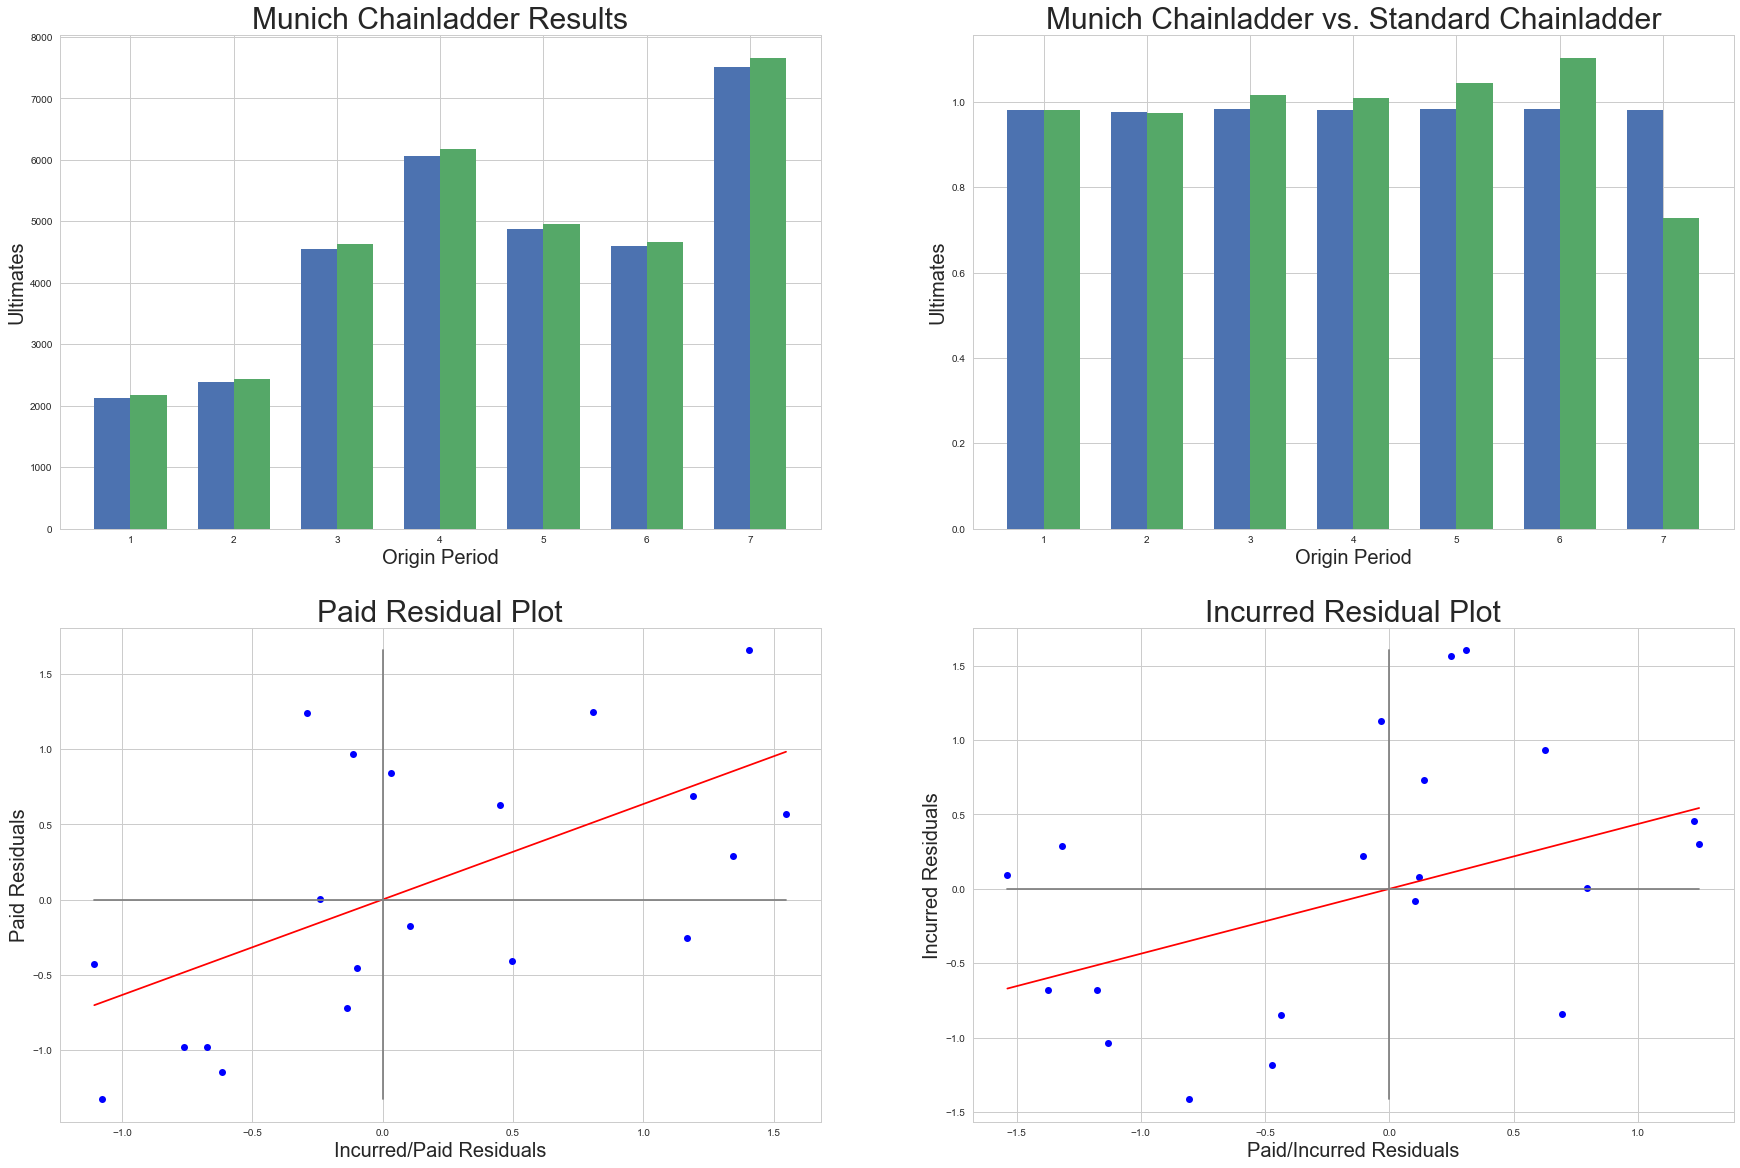

In [7]:
MCL.plot()